# Quick intro

One pair of ts, with pictures:


0 1 ['meanfield', 'laplace']
meanfield vals OrderedDict([('obs', tensor(7.)), ('df', tensor(2.)), ('sig', tensor(0.4000)), ('assymmetry', 2.0)])
epoch 0 loss = 148.6389944257851; mean_loss= None; ()
epoch 100 loss = 6.760227597428333; mean_loss= None; ()
epoch 200 loss = 9.157706210474787; mean_loss= None; ()
epoch 300 loss = 7.082728989363186; mean_loss= None; ()
epoch 400 loss = 7.687951511461109; mean_loss= None; ()
epoch 500 loss = 6.921213392692443; mean_loss= None; ()
epoch 600 loss = 7.042957321701761; mean_loss= None; ()
epoch 700 loss = 7.120502756505553; mean_loss= None; ()
epoch 800 loss = 8.401549086162818; mean_loss= None; ()
epoch 900 loss = 8.362430232663035; mean_loss= None; ()
epoch 1000 loss = 6.464439267896916; mean_loss= None; ()
epoch 1100 loss = 5.8147537137701715; mean_loss= None; ()
epoch 1200 loss = 5.410761001223037; mean_loss= None; ()
epoch 1300 loss = 8.560199946400012; mean_loss= None; ()
epoch 1400 loss = 5.8933978183128755; mean_loss= None; ()
epoch 1500

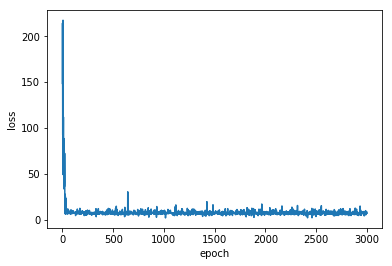

mean_loss: 7.161988387237249
laplace vals OrderedDict([('obs', tensor(7.)), ('df', tensor(2.)), ('sig', tensor(0.4000)), ('assymmetry', 2.0)])
epoch 0 loss = 152.46694849964223; mean_loss= None; ()
epoch 100 loss = 5.675887290562734; mean_loss= None; ()
epoch 200 loss = 5.1860712075570214; mean_loss= None; ()
epoch 300 loss = 5.85217422949457; mean_loss= None; ()
epoch 400 loss = 5.2565300323302475; mean_loss= None; ()
epoch 500 loss = 5.864094808714422; mean_loss= None; ()
epoch 600 loss = 6.339818564195729; mean_loss= None; ()
epoch 700 loss = 5.286465781447067; mean_loss= None; ()
epoch 800 loss = 5.4399396964816935; mean_loss= None; ()
epoch 900 loss = 6.292226727592691; mean_loss= None; ()
epoch 1000 loss = 5.893387169424942; mean_loss= None; ()
epoch 1100 loss = 5.69697747951318; mean_loss= None; ()
epoch 1200 loss = 6.880847176614413; mean_loss= None; ()
epoch 1300 loss = 5.722347946425916; mean_loss= None; ()
epoch 1400 loss = 4.528121377676156; mean_loss= None; ()
epoch 1500 l

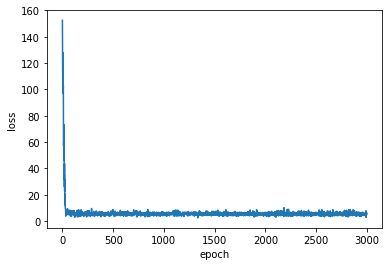

mean_loss: 5.502062184283814
max tensor([-6.8653], grad_fn=<AddBackward0>)


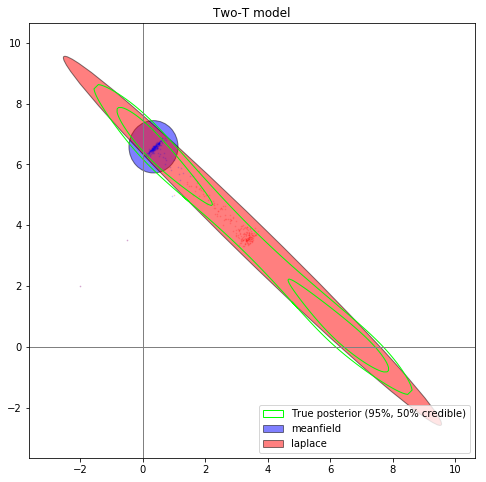

KLdivs


sample: 100%|████████████████████████████████| 1050/1050 [00:03<00:00, 285.31it/s, step size=2.73e-01, acc. prob=0.321]




                mean       std    median     25.0%     75.0%     n_eff     r_hat
effects[0]      3.52      2.73      3.77      3.17      7.42      5.42      1.68
effects[1]      3.45      2.70      3.11     -0.63      3.37      5.34      1.68


KLdivs testresults/demo_amortized_laplace.fitted.csv torch.Size([1000, 2])
0 1 ['meanfield', 'laplace']












In [10]:
from importlib import reload
import twoT #import *
reload(twoT)
from twoT import *
import cProfile as profile

#vals = MIDDF35
guidenames = ["meanfield","laplace",]#,"MLE"]
if True:

    for aniter in range(1):
        
        
        for nparticles in [1]:#,5]:
                for vals in [LOWDFP,]:#HIDFP,LOWDF0,LOWDFM,LOWDFP,MIDDFP,HIDF0,]:
                    #

                    print(aniter,nparticles,guidenames,)
                    result = trainGuides(guidenames,nparticles,vals,filebase="testresults/demo_amortized_laplace")
                    print(aniter,nparticles,guidenames)
                    for line in range(10):
                        print()
                    
else:
    plt.plot([getMLE(.01 + x/100,1.,0,1.) for x in range(500)])
                    

playing with twoT: MCMC?

In [17]:
from importlib import reload
import twoT #import *
reload(twoT)
from twoT import *
import cProfile as profile

from pyro.infer.mcmc import NUTS
from pyro.infer.mcmc.api import MCMC


print(model_lps(ts([3.5,3.5]),LOWDFP))

print(model_lps(ts([7.0,0.]),LOWDFP))
print(model_lps(ts([6.0,0.]),LOWDFP))

def conditioned_model(model, *args):
    return poutine.condition(model, data={})(*args)

nuts_kernel = NUTS(conditioned_model, jit_compile=False,)
mcmc = MCMC(nuts_kernel,
            num_samples=10,
            warmup_steps=50,
            num_chains=1)
mcmc.run(model, ts(7.),ts(2.))
mcmc.summary(prob=0.5)

mcmc._samples["effects"].size()



tensor(-7.9729)
tensor(-6.9401)
tensor(-9.6237)


sample: 100%|█████████████████████████████████████| 60/60 [00:00<00:00, 78.13it/s, step size=2.03e-01, acc. prob=0.953]




                mean       std    median     25.0%     75.0%     n_eff     r_hat
effects[0]      2.28      3.22      0.89     -1.21      1.14      4.46      0.90
effects[1]      4.70      3.11      5.51      5.51      7.88      4.51      0.90




torch.Size([10, 2])

Amortizable hierarchical t model:

So...
max tensor([-6.8653], grad_fn=<AddBackward0>)
complaint 9 loss tensor(-1.2117e-09, grad_fn=<NegBackward>)
complaint 8 adjusted tensor([2.2284, 4.6784], grad_fn=<AddBackward0>) tensor([2.2284, 4.6784]) tensor(-7.7013, grad_fn=<AddBackward0>) tensor([-7.7014], grad_fn=<AddBackward0>)
complaint 7 loss tensor(-6.2909e-08, grad_fn=<NegBackward>)
complaint 6 adjusted tensor([2.2047, 4.7547], grad_fn=<AddBackward0>) tensor([2.2047, 4.7547]) tensor(-7.7011, grad_fn=<AddBackward0>) tensor([-7.7014], grad_fn=<AddBackward0>)
complaint 5 loss tensor(-2.2016e-07, grad_fn=<NegBackward>)
complaint 4 adjusted tensor([2.1704, 4.8204], grad_fn=<AddBackward0>) tensor([2.1704, 4.8204]) tensor(-7.7009, grad_fn=<AddBackward0>) tensor([-7.7014], grad_fn=<AddBackward0>)
complaint 3 loss tensor(-4.7214e-07, grad_fn=<NegBackward>)
complaint 2 adjusted tensor([2.1330, 4.8830], grad_fn=<AddBackward0>) tensor([2.1330, 4.8830]) tensor(-7.7007, grad_fn=<AddBackward0>) tensor([-7.7014], grad_fn=<AddBackward0>)


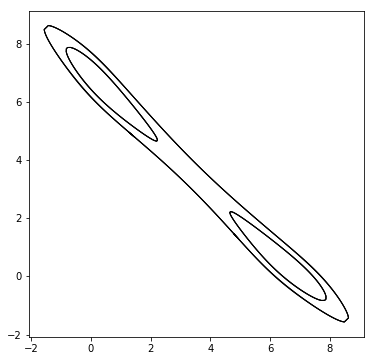

In [31]:
from importlib import reload
import twoT #import *
reload(twoT)
from twoT import *
import cProfile as profile

print("So...")
kwargs = dict(obs=ts(7.),df=ts(2.),sig=ts(.4))
kwargs = dict(obs=ts(4.),df=ts(5.),sig=ts(.4))
kwargs = dict(obs=ts(7.),df=ts(2.),sig=ts(.4))
ps = getTruePosteriors([.5,.95],-8,.1,[.01,.8,1.],**kwargs)


fig, ax = plt.subplots(figsize=(6, 6))
for p in ps:
    ax.fill([x for x,y in p], [y for x,y in p], fill=False)

#confidence_ellipse(torch.ones(2),torch.eye(2),ax,alpha=0.5, facecolor='pink', edgecolor='purple', zorder=0)
#print("hi")
plt.show()